In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

/home/safwan/virenv/base3.8/lib/python3.8/site-packages/bagpy/bagreader.py:121: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.5
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  warnings.warn("{}\n{}\n{}\n{}\n{}\n{}".format(


In [12]:
b = bagreader('/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_18/2021_07_18_22_17_10_2T3W1RFV0MC103811_ghost_mode_velocityfollowing_mpc_fangyu.bag')

[INFO]  Successfully created the data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_18/2021_07_18_22_17_10_2T3W1RFV0MC103811_ghost_mode_velocityfollowing_mpc_fangyu.


In [13]:
# b.topic_table

In [14]:
CMD_ACC_MSG = b.message_by_topic('/timed_accel')
ACC_MSG = b.message_by_topic('/vehicle/accel')
GHOST_VEL_MSG = b.message_by_topic('/ghost/vehicle/vel')
VEL_MSG = b.message_by_topic('/vehicle/vel')

In [15]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_vel = pd.read_csv(VEL_MSG)
t0 = df_gvel['Time'][0]

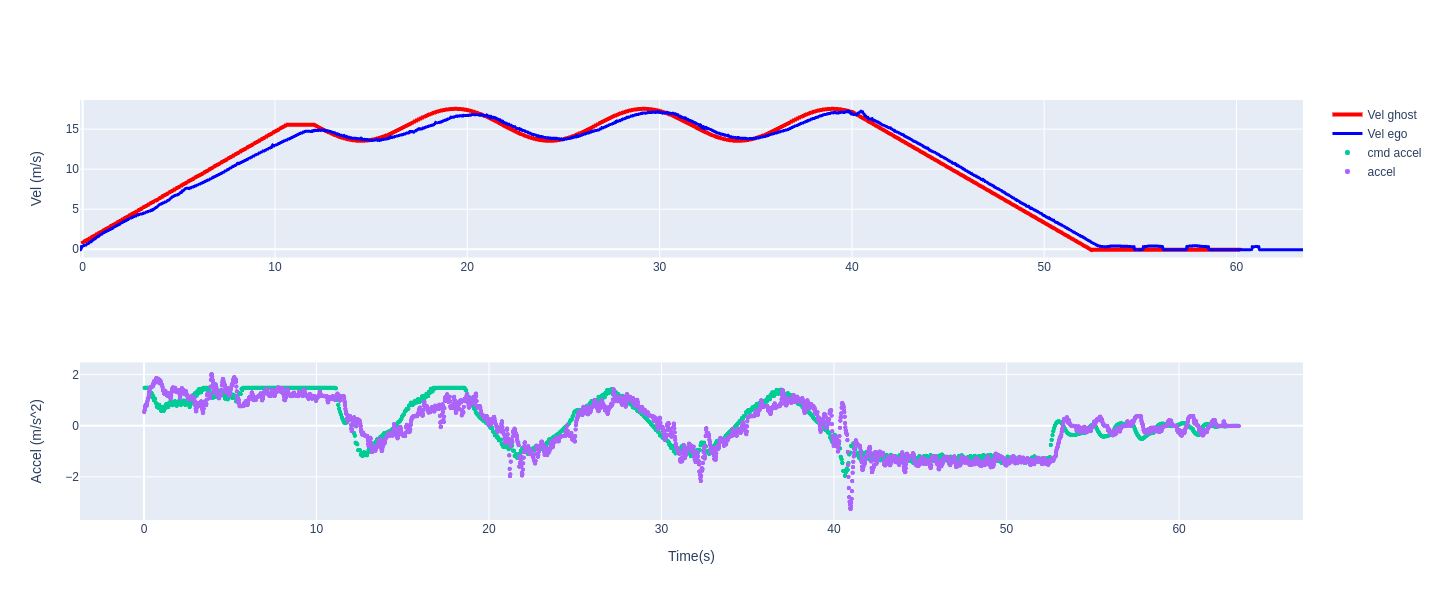

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=2, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_gvel['Time']-t0,
    y=df_gvel['twist.linear.x'],
     name="Vel ghost",
      line=dict(
        width=4,
          color="red",
     ),
), row=1, col=1)
figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['twist.linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="Vel ego",
), row=1, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=2, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['accel.linear.x'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=2, col=1)

figr.update_xaxes(title_text="Time(s)", row=2, col=1)

figr.update_yaxes(title_text="Vel (m/s)", row=1, col=1)
figr.update_yaxes(title_text="Accel (m/s^2)", row=2, col=1)



figr.update_layout(height=600, width=800, title_text="")
figr.show()